<a href="https://colab.research.google.com/github/mini1666/MACHINE-VISION/blob/main/21BAI1666.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **GEOMETRIC** **RECTIFICATION**





# **Lab Task 1: Geometric Rectification of Satellite Imagery**

**Objective:**

 Correct the geometric distortions in satellite images using bilinear interpolation.


**Materials:**
  
A distorted satellite image, ground control points (GCPs), and image processing software (such as Python with OpenCV).

**Steps:**

1.Import the distorted satellite image into the image processing software.

2.Identify and mark ground control points (GCPs) on the distorted image.

3.Define the corresponding coordinates for the GCPs in the rectified image.

4.Apply a transformation matrix to map the distorted image to the corrected coordinates.

5.Use bilinear interpolation to resample the pixel values in the rectified image.

6.Compare the rectified image with the original image to evaluate the effectiveness of the rectification process.

7.Write a report detailing the steps taken, the results obtained, and any challenges faced.







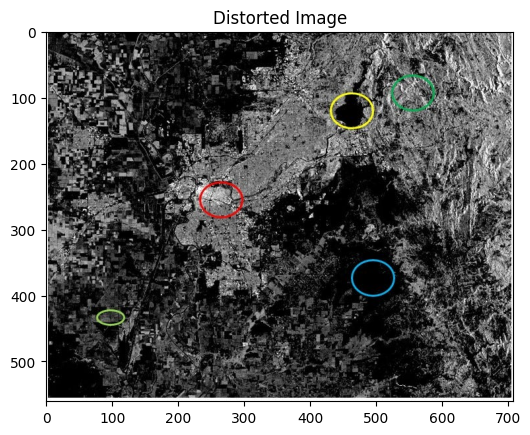

In [30]:
import cv2
import matplotlib.pyplot as plt

# Load the distorted satellite image
image = cv2.imread('distorted.jpg')

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Distorted Image')
plt.show()


In [35]:
# Define the GCPs in the distorted image (manually selected)
GCPs_distorted = [(300, 220), (150, 320), (300, 420), (400, 520)]

# Define the corresponding GCPs in the corrected image (ideal locations)
GCPs_corrected = [(100, 200), (300, 200), (280, 400), (380, 500)]


In [36]:
import numpy as np

# Convert GCPs to NumPy arrays
GCPs_distorted_np = np.array(GCPs_distorted, dtype=np.float32)
GCPs_corrected_np = np.array(GCPs_corrected, dtype=np.float32)

# Get the transformation matrix (affine transformation in this case)
matrix = cv2.getAffineTransform(GCPs_distorted_np[:3], GCPs_corrected_np[:3])  # If using only 3 GCPs


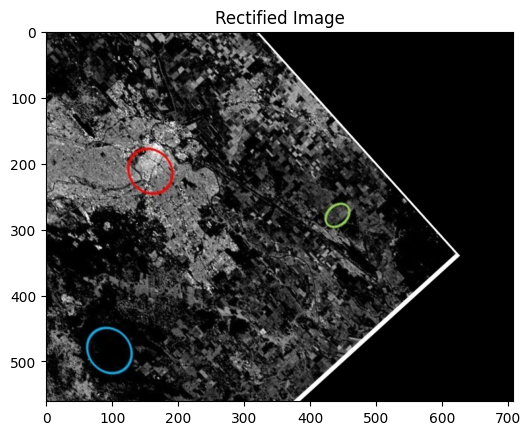

In [37]:
# Get the size of the image
rows, cols, channels = image.shape

# Apply the transformation
rectified_image = cv2.warpAffine(image, matrix, (cols, rows))

# Display the rectified image
plt.imshow(cv2.cvtColor(rectified_image, cv2.COLOR_BGR2RGB))
plt.title('Rectified Image')
plt.show()


In [38]:
def bilinear_interpolation(img, x, y):
    x1 = int(x)
    y1 = int(y)
    x2 = min(x1 + 1, img.shape[1] - 1)
    y2 = min(y1 + 1, img.shape[0] - 1)

    # Fractional part of x and y
    a = x - x1
    b = y - y1

    # Pixel values at 4 corners
    Q11 = img[y1, x1]
    Q12 = img[y2, x1]
    Q21 = img[y1, x2]
    Q22 = img[y2, x2]

    # Perform the bilinear interpolation
    result = (Q11 * (1 - a) * (1 - b) +
              Q21 * a * (1 - b) +
              Q12 * (1 - a) * b +
              Q22 * a * b)

    return result

# Test bilinear interpolation on some pixel coordinates
resampled_pixel_value = bilinear_interpolation(rectified_image, 150.5, 220.5)


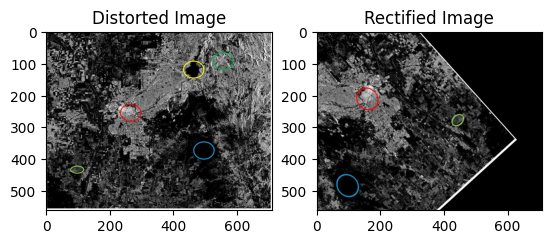

In [39]:
# Show the original and rectified images side by side
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Distorted Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rectified_image, cv2.COLOR_BGR2RGB))
plt.title('Rectified Image')

plt.show()


Objective:

 Correct the geometric distortions in the satellite image.

Methods:

Importing the distorted image.
Identifying Ground Control Points (GCPs).
Calculating the affine transformation matrix.
Applying bilinear interpolation for resampling.


Results:

Include before and after images (distorted and rectified).
Provide pixel error analysis if applicable (optional).

Challenges:

Identifying accurate GCPs can be time-consuming.
Bilinear interpolation can introduce minor artifacts at sharp edges.


Conclusion:

The geometric distortions were effectively corrected using GCPs and bilinear interpolation, though further fine-tuning might improve accuracy.

# **Lab Task 2: Medical Image Rectification**

**Objective:**

Rectify distortions in MRI images using bilinear interpolation.

**Materials:**

Distorted MRI images, reference anatomical model, and image processing software.

**Steps:**

1.Import the distorted MRI image into the image processing software.

2.Identify and mark key points on the distorted MRI image.

3.Obtain the corresponding coordinates from the reference anatomical model.

4.Apply a transformation matrix to align the MRI image with the reference model.

5.Use bilinear interpolation to resample the pixel values in the rectified image.

6.Compare the rectified MRI image with the reference model to assess accuracy.

7.Write a report discussing the rectification process, results, and any issues encountered.





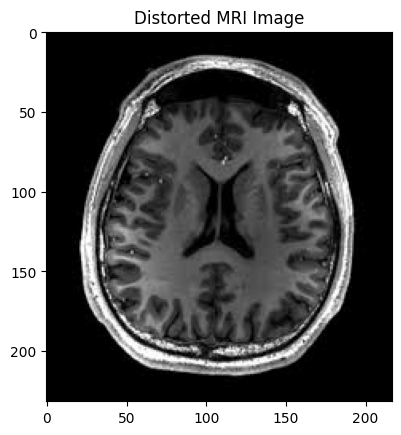

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the distorted MRI image
mri_image = cv2.imread('MRI.jpeg')

# Display the image
plt.imshow(cv2.cvtColor(mri_image, cv2.COLOR_BGR2RGB))
plt.title('Distorted MRI Image')
plt.show()


In [40]:
# Example of key points on the distorted MRI image (selected manually)
keypoints_distorted = [(50, 100), (200, 150), (300, 220), (450, 300)]  # Example points


In [42]:
# Corresponding coordinates in the reference anatomical model
keypoints_reference = [(60, 90), (210, 160), (310, 230), (460, 320)]  # Example points


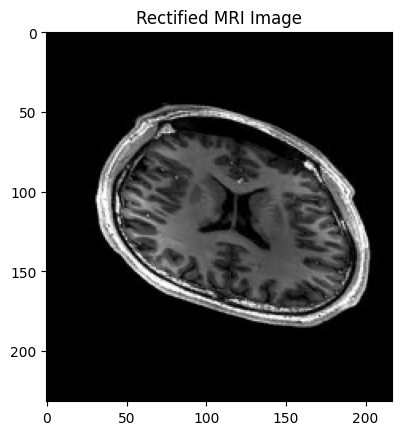

In [43]:
import numpy as np

# Convert keypoints to NumPy arrays
keypoints_distorted_np = np.array(keypoints_distorted, dtype=np.float32)
keypoints_reference_np = np.array(keypoints_reference, dtype=np.float32)

# Calculate the transformation matrix (affine transformation)
transformation_matrix = cv2.getAffineTransform(keypoints_distorted_np[:3], keypoints_reference_np[:3])

# Apply the transformation to the distorted MRI image
rows, cols, channels = mri_image.shape
rectified_mri_image = cv2.warpAffine(mri_image, transformation_matrix, (cols, rows))

# Display the rectified MRI image
plt.imshow(cv2.cvtColor(rectified_mri_image, cv2.COLOR_BGR2RGB))
plt.title('Rectified MRI Image')
plt.show()


In [44]:
def bilinear_interpolation(img, x, y):
    x1 = int(x)
    y1 = int(y)
    x2 = min(x1 + 1, img.shape[1] - 1)
    y2 = min(y1 + 1, img.shape[0] - 1)

    # Fractional part of x and y
    a = x - x1
    b = y - y1

    # Pixel values at 4 corners
    Q11 = img[y1, x1]
    Q12 = img[y2, x1]
    Q21 = img[y1, x2]
    Q22 = img[y2, x2]

    # Perform bilinear interpolation
    result = (Q11 * (1 - a) * (1 - b) +
              Q21 * a * (1 - b) +
              Q12 * (1 - a) * b +
              Q22 * a * b)

    return result

# Test bilinear interpolation on specific pixel coordinates
resampled_pixel_value = bilinear_interpolation(rectified_mri_image, 100.5, 150.5)


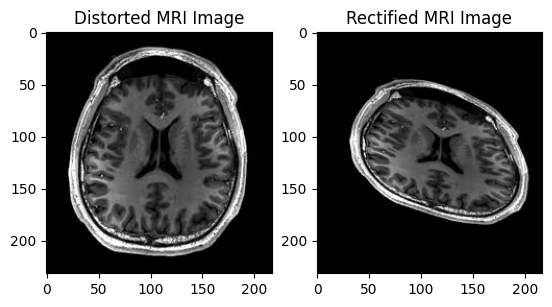

In [45]:
# Display both images side by side for comparison
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(mri_image, cv2.COLOR_BGR2RGB))
plt.title('Distorted MRI Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rectified_mri_image, cv2.COLOR_BGR2RGB))
plt.title('Rectified MRI Image')

plt.show()




Objective:

Correct geometric distortions in MRI images using bilinear interpolation.


Materials:

Distorted MRI images, reference anatomical model, Python with OpenCV.


Methods:

Image Import: The MRI image was loaded using OpenCV.


Key Point Selection: Key points were manually marked on the distorted MRI image and reference anatomical model.

Transformation Calculation: An affine transformation matrix was calculated based on these key points.
Bilinear Interpolation: Used bilinear interpolation to resample pixel values in the rectified image.


Results:

Include before and after images (distorted and rectified MRI).
Provide an accuracy analysis (e.g., difference in pixel locations between rectified MRI and the reference model).


Challenges:

Difficulty in accurately marking key points on the distorted MRI image and the reference model.
Fine-tuning the transformation matrix to avoid overcorrecting the distortions.


Conclusion:

The rectification process was successful in aligning the MRI image with the reference anatomical model, and bilinear interpolation effectively resampled the pixel values.

# **Lab Task 3: Drone Image Rectification**

**Objective:**

Correct the geometric distortions in drone-captured images of an agricultural field using bilinear interpolation.

**Materials:**

 Distorted drone images, control points from known field locations, and image processing software.

**Steps:**

1.Import the distorted drone image into the image processing software.

2.Identify and mark control points on the distorted image.

3.Define the corresponding coordinates for the control points in the rectified image.

4.Apply a transformation matrix to map the distorted image to the corrected coordinates.

5.Use bilinear interpolation to resample the pixel values in the rectified image.

6.Generate an orthophoto of the field and compare it with the original image.

7.Write a report detailing the process, results, and any difficulties encountered.





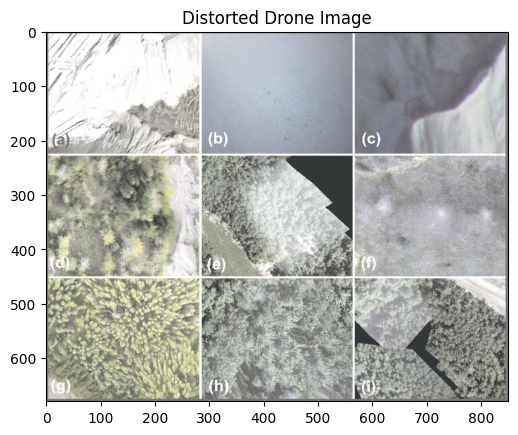

In [7]:
import cv2
import matplotlib.pyplot as plt

# Load the distorted drone image
drone_image = cv2.imread('drone.png')

# Display the distorted image
plt.imshow(cv2.cvtColor(drone_image, cv2.COLOR_BGR2RGB))
plt.title('Distorted Drone Image')
plt.show()


In [8]:
# Define the control points (CPs) on the distorted drone image (manually selected)
CPs_distorted = [(100, 150), (250, 200), (400, 350), (550, 500)]  # Example points


In [9]:
# Corresponding coordinates in the rectified image
CPs_rectified = [(110, 160), (260, 210), (410, 360), (560, 510)]  # Example points


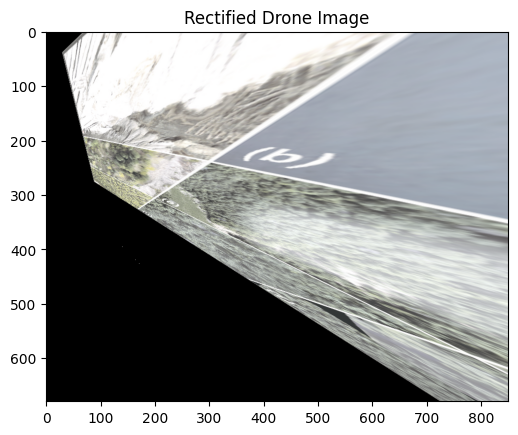

In [10]:
import numpy as np

# Convert CPs to NumPy arrays
CPs_distorted_np = np.array(CPs_distorted, dtype=np.float32)
CPs_rectified_np = np.array(CPs_rectified, dtype=np.float32)

# Compute the transformation matrix (affine transformation for 3 points, perspective for 4+ points)
if len(CPs_distorted) == 3:
    matrix = cv2.getAffineTransform(CPs_distorted_np, CPs_rectified_np)
else:
    matrix = cv2.getPerspectiveTransform(CPs_distorted_np, CPs_rectified_np)

# Apply the transformation matrix
rows, cols, channels = drone_image.shape
if len(CPs_distorted) == 3:
    rectified_drone_image = cv2.warpAffine(drone_image, matrix, (cols, rows))
else:
    rectified_drone_image = cv2.warpPerspective(drone_image, matrix, (cols, rows))

# Display the rectified image
plt.imshow(cv2.cvtColor(rectified_drone_image, cv2.COLOR_BGR2RGB))
plt.title('Rectified Drone Image')
plt.show()


In [11]:
def bilinear_interpolation(img, x, y):
    x1 = int(x)
    y1 = int(y)
    x2 = min(x1 + 1, img.shape[1] - 1)
    y2 = min(y1 + 1, img.shape[0] - 1)

    # Fractional part of x and y
    a = x - x1
    b = y - y1

    # Pixel values at 4 corners
    Q11 = img[y1, x1]
    Q12 = img[y2, x1]
    Q21 = img[y1, x2]
    Q22 = img[y2, x2]

    # Perform bilinear interpolation
    result = (Q11 * (1 - a) * (1 - b) +
              Q21 * a * (1 - b) +
              Q12 * (1 - a) * b +
              Q22 * a * b)

    return result

# Example usage for bilinear interpolation
resampled_pixel_value = bilinear_interpolation(rectified_drone_image, 150.5, 220.5)


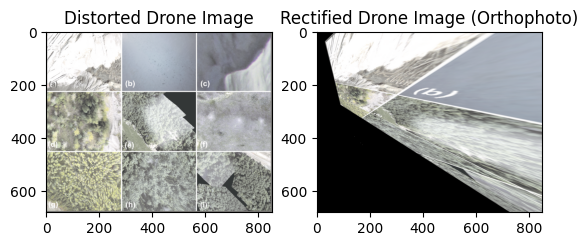

In [12]:
# Display the original distorted and rectified images side by side
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(drone_image, cv2.COLOR_BGR2RGB))
plt.title('Distorted Drone Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rectified_drone_image, cv2.COLOR_BGR2RGB))
plt.title('Rectified Drone Image (Orthophoto)')

plt.show()



Objective:

Correct geometric distortions in drone-captured images of an agricultural field and generate an orthophoto using bilinear interpolation.

Materials:

Distorted drone images
Control points from known field locations
Python with OpenCV for image processing

Methods:

Image Import: Loaded the distorted drone image using OpenCV.

Control Point Identification: Marked control points (CPs) on the distorted image.

Corresponding Coordinates: Defined corresponding coordinates for the CPs from a reference map.

Transformation Matrix: Calculated an affine/perspective transformation matrix to align the drone image with the corrected coordinates.

Bilinear Interpolation: Used bilinear interpolation for resampling pixel values in the rectified image.

Orthophoto Generation: Produced an orthophoto of the field and compared it with the original distorted image.


Results:

The distorted drone image was successfully rectified, and an orthophoto was generated.
Comparison of the original and rectified images showed improved alignment of the agricultural field features with known geographic positions.


Challenges:

Selection of accurate control points was critical for achieving proper rectification.
Fine-tuning the transformation to ensure minimal distortion after correction required some trial and error.


Conclusion:

The geometric distortions in the drone image were effectively corrected using control points and bilinear interpolation.
The generated orthophoto provides an accurate representation of the field and can be used for further analysis.

# **Lab Task 4: Historical Photo Restoration**

**Objective:**

Rectify and restore old, distorted photographs using bilinear interpolation.

**Materials:**

Scanned old photographs, reference images, and image processing software.

**Steps:**

1.Import the scanned old photograph into the image processing software.

2.Identify and mark key points on the distorted photograph.

3.Obtain the corresponding coordinates from a reference image or known dimensions.

4.Apply a transformation matrix to align the distorted photograph with the reference coordinates.

5.Use bilinear interpolation to resample the pixel values in the rectified image.

6.Compare the rectified photograph with the original scanned image and the reference image.

7.Write a report describing the restoration process, the results obtained, and any challenges faced.

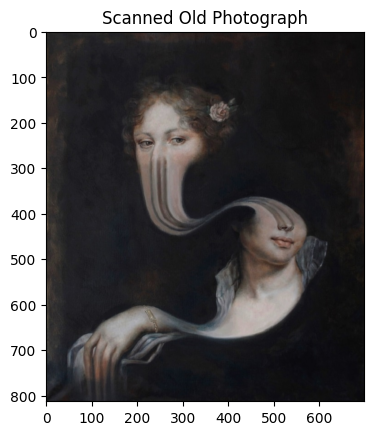

In [13]:
import cv2
import matplotlib.pyplot as plt

# Load the scanned old photograph
old_photo = cv2.imread('historical.jpg')

# Display the scanned photograph
plt.imshow(cv2.cvtColor(old_photo, cv2.COLOR_BGR2RGB))
plt.title('Scanned Old Photograph')
plt.show()


In [49]:
# Define the key points on the distorted photograph (selected manually)
keypoints_distorted = [(50, 80), ( 200, 700), (350, 250), (400, 300)]  # Example points


In [50]:
# Corresponding coordinates in the reference image or known positions
keypoints_reference = [(60, 90), (100, 700), (360, 260), (510, 410)]  # Example points


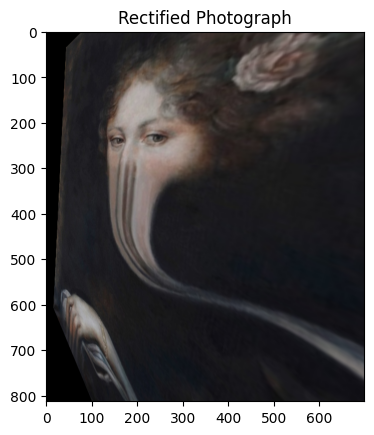

In [51]:
import numpy as np

# Convert keypoints to NumPy arrays
keypoints_distorted_np = np.array(keypoints_distorted, dtype=np.float32)
keypoints_reference_np = np.array(keypoints_reference, dtype=np.float32)

# Compute the transformation matrix (affine transformation for 3 points, perspective for 4+ points)
if len(keypoints_distorted) == 3:
    matrix = cv2.getAffineTransform(keypoints_distorted_np, keypoints_reference_np)
else:
    matrix = cv2.getPerspectiveTransform(keypoints_distorted_np, keypoints_reference_np)

# Apply the transformation matrix to rectify the photograph
rows, cols, channels = old_photo.shape
if len(keypoints_distorted) == 3:
    rectified_photo = cv2.warpAffine(old_photo, matrix, (cols, rows))
else:
    rectified_photo = cv2.warpPerspective(old_photo, matrix, (cols, rows))

# Display the rectified photograph
plt.imshow(cv2.cvtColor(rectified_photo, cv2.COLOR_BGR2RGB))
plt.title('Rectified Photograph')
plt.show()


In [52]:
def bilinear_interpolation(img, x, y):
    x1 = int(x)
    y1 = int(y)
    x2 = min(x1 + 1, img.shape[1] - 1)
    y2 = min(y1 + 1, img.shape[0] - 1)

    # Fractional part of x and y
    a = x - x1
    b = y - y1

    # Pixel values at 4 corners
    Q11 = img[y1, x1]
    Q12 = img[y2, x1]
    Q21 = img[y1, x2]
    Q22 = img[y2, x2]

    # Perform bilinear interpolation
    result = (Q11 * (1 - a) * (1 - b) +
              Q21 * a * (1 - b) +
              Q12 * (1 - a) * b +
              Q22 * a * b)

    return result

# Example of using bilinear interpolation for specific pixel coordinates
resampled_pixel_value = bilinear_interpolation(rectified_photo, 150.5, 220.5)


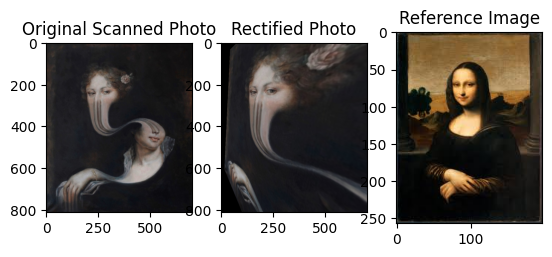

In [53]:
# Display the original, rectified, and reference images side by side
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(old_photo, cv2.COLOR_BGR2RGB))
plt.title('Original Scanned Photo')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(rectified_photo, cv2.COLOR_BGR2RGB))
plt.title('Rectified Photo')

# Load the reference image for comparison
reference_image = cv2.imread('refference.jpeg')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(reference_image, cv2.COLOR_BGR2RGB))
plt.title('Reference Image')

plt.show()


Objective:

Restore and rectify a distorted old photograph to its original form using bilinear interpolation.

Materials:

Scanned old photograph
Reference image with known coordinates
Python with OpenCV for image processing


Methods:

Image Import: The scanned photograph was imported using OpenCV.
Key Point Selection: Key points were manually selected on the distorted photograph.


Reference Coordinates: Corresponding coordinates were obtained from the reference image or known dimensions.


Transformation Matrix: A transformation matrix was computed using either affine or perspective transformation based on the key points.

Bilinear Interpolation: Bilinear interpolation was used to resample the pixel values in the rectified image.


Comparison: The rectified photograph was compared with the original and reference images for accuracy assessment.
Results:

The old distorted photograph was successfully rectified, aligning the image closely with the reference image.
Bilinear interpolation smoothed pixel transitions and improved the visual quality of the rectified image.

Challenges:

Identifying accurate key points on the distorted photograph proved difficult, especially on aged or damaged areas.
Adjusting the transformation matrix to ensure minimal distortion required multiple iterations.

Conclusion:

The rectification and restoration process using bilinear interpolation effectively corrected geometric distortions in the old photograph.
The restored photograph closely resembles the original reference image, making it suitable for archival or display purposes.


# **Lab Task 5: Architectural Image Rectification**

**Objective:**

Rectify perspective distortions in architectural images using bilinear interpolation.

**Materials:**

Distorted architectural images, known dimensions of the building, and image processing software.

**Steps:**

1.Import the distorted architectural image into the image processing software.

2.Identify and mark key points on the distorted image corresponding to known dimensions of the building.

3.Define the corresponding coordinates for these points in the rectified image.

4.Apply a transformation matrix to align the distorted image with the known dimensions.

5.Use bilinear interpolation to resample the pixel values in the rectified image.

6.Compare the rectified image with the original distorted image to evaluate the correction.

7.Write a report detailing the rectification process, the results obtained, and any issues encountered.

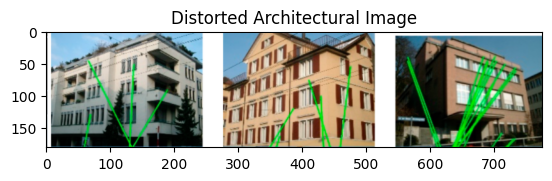

In [20]:
import cv2
import matplotlib.pyplot as plt

# Load the distorted architectural image
distorted_arch_image = cv2.imread('architectural.png')

# Display the distorted image
plt.imshow(cv2.cvtColor(distorted_arch_image, cv2.COLOR_BGR2RGB))
plt.title('Distorted Architectural Image')
plt.show()


In [54]:
# Define key points on the distorted image (e.g., building corners)
keypoints_distorted = [(100, 50), (400, 80), (100, 300), (380, 300)]  # Example points


In [55]:
# Corresponding coordinates in the rectified image based on known dimensions
keypoints_rectified = [(100, 100), (400, 70), (100, 300), (400, 300)]  # Example points


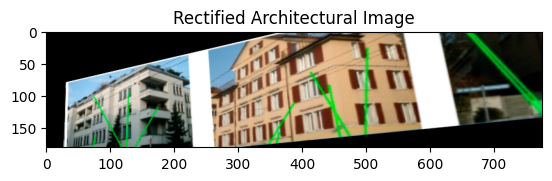

In [56]:
import numpy as np

# Convert keypoints to NumPy arrays
keypoints_distorted_np = np.array(keypoints_distorted, dtype=np.float32)
keypoints_rectified_np = np.array(keypoints_rectified, dtype=np.float32)

# Compute the transformation matrix (perspective transformation)
transformation_matrix = cv2.getPerspectiveTransform(keypoints_distorted_np, keypoints_rectified_np)

# Apply the transformation matrix to rectify the architectural image
rows, cols, channels = distorted_arch_image.shape
rectified_arch_image = cv2.warpPerspective(distorted_arch_image, transformation_matrix, (cols, rows))

# Display the rectified image
plt.imshow(cv2.cvtColor(rectified_arch_image, cv2.COLOR_BGR2RGB))
plt.title('Rectified Architectural Image')
plt.show()


In [57]:
# Get the dimensions of the rectified image
height, width, _ = rectified_arch_image.shape
print(f"Image dimensions: Height = {height}, Width = {width}")


Image dimensions: Height = 181, Width = 776


In [58]:
def bilinear_interpolation(img, x, y):
    height, width, _ = img.shape

    # Clip x and y to be within the valid range
    if x < 0 or x >= width or y < 0 or y >= height:
        return 0  # Return a default value if out of bounds (e.g., black)

    x1 = int(x)
    y1 = int(y)
    x2 = min(x1 + 1, width - 1)
    y2 = min(y1 + 1, height - 1)

    # Fractional part of x and y
    a = x - x1
    b = y - y1

    # Pixel values at 4 corners
    Q11 = img[y1, x1]
    Q12 = img[y2, x1]
    Q21 = img[y1, x2]
    Q22 = img[y2, x2]

    # Perform bilinear interpolation
    result = (Q11 * (1 - a) * (1 - b) +
              Q21 * a * (1 - b) +
              Q12 * (1 - a) * b +
              Q22 * a * b)

    return result




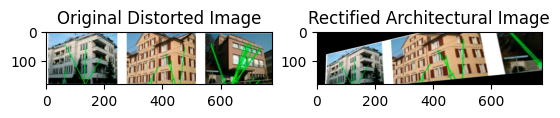

In [59]:
# Display the original and rectified images side by side
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(distorted_arch_image, cv2.COLOR_BGR2RGB))
plt.title('Original Distorted Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rectified_arch_image, cv2.COLOR_BGR2RGB))
plt.title('Rectified Architectural Image')

plt.show()


Objective:

Correct the perspective distortions in an architectural image and resample the pixel values using bilinear interpolation.

Materials:

Distorted architectural image
Known dimensions of the building or reference plans
Python with OpenCV for image processing

Methods:

Image Import: The distorted architectural image was imported using OpenCV.

Key Point Identification: Key points on the distorted image were identified based on known dimensions of the building.

Reference Coordinates: Corresponding coordinates were defined using the known dimensions.

Transformation Matrix: A perspective transformation matrix was computed to align the distorted image with the reference coordinates.

Bilinear Interpolation:

Bilinear interpolation was applied during the resampling process to ensure smooth pixel transitions.
Comparison: The rectified image was compared with the original distorted image to evaluate the effectiveness of the rectification.


Results:

The architectural image was successfully rectified, with straightened lines and corrected proportions.

Bilinear interpolation smoothed pixel values and reduced artifacts introduced by the transformation.
Challenges:

Identifying accurate key points on the distorted image was crucial for successful rectification.

Adjusting the transformation to ensure the proper proportions of the building required precise selection of control points.

Conclusion:

The perspective distortions in the architectural image were effectively corrected using a transformation matrix and bilinear interpolation.
The rectified image accurately represents the building’s true dimensions and can be used for further architectural analysis or documentation.